# Cleaned Final Sample #

We examined 9999 galaxies by eye while observing at WIYN 0.9m telescope in Feb 2020.

Made cutouts for each galaxy, 50 galaxies per sheet.


In [36]:
from astropy.io import fits, ascii
from matplotlib import pyplot as plt
from astropy.table import Table
import os
%matplotlib inline

# Creating Cutouts #


# Reviewing Single Images #

In [3]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/create-super-sample.py

Welcome!

To build catalogs, try: 

 	 s=sample()
 	 s.get_smart() 
 
 OR
	 s.run_it()


To read table and plot images, try: 

 	 t=fulltable()
 	 t.agc_only() )


In [4]:
t = fulltable()

LENGTH GALIDS_IN_FOV =  9999


cutout image size is  60


[1881, 9515]

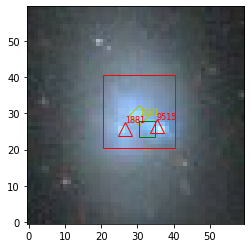

In [5]:
t.one_gal(1881,imsize=60,dssflag=False)

problem accessing image
cutouts/legacy-im-109.40918--22.35183-60.fits
http://legacysurvey.org/viewer/cutout.fits?ra=109.40918&dec=-22.351828&layer=dr8&size=60&pixscale=1.00
trouble in paradise 3959
maybe coords are outside Legacy Survey?
109.40918 -22.351828
using DSS2 image  cutouts/DSS2-109.40918--22.35183-60-1arcsecpix.fits
cutout image size is  60


[3959, 4031]

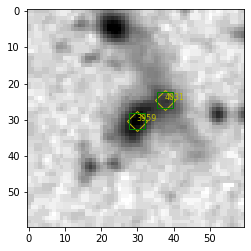

In [6]:
t.one_gal(3959,imsize=60,dssflag=False)

# Downloading Spreadsheet with by-eye Classifications#

spreadsheet is at

https://docs.google.com/spreadsheets/d/1GtvYTBU3tAXI7ngklFWms3WpnGhbzpp3Nn-_VO7sioc/edit?usp=sharing

Download as a xlsx file.  Will get saved in ~/Downloads/

In [19]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
!mv /home/rfinn/Downloads/virgo_check_sample_by_eye.xlsx virgo_check_sample_by_eye.finished.xlsx

In [20]:
!ls -lth

total 61M
-rw-rw-r-- 1 rfinn rfinn 909K Mar  1 03:06 virgo_check_sample_by_eye.finished.xlsx
-rw-rw-r-- 1 rfinn rfinn 5.4M Mar  1 03:00 z0MGS_tbl.csv
-rw-rw-r-- 1 rfinn rfinn 1.2M Mar  1 02:57 clean_sample.fits
-rw-rw-r-- 1 rfinn rfinn 977K Mar  1 02:51 virgo_check_sample_by_eye.csv
-rw-rw-r-- 1 rfinn rfinn 489K Feb 29 01:11 clean_sample.txt
drwxrwxr-x 2 rfinn rfinn 1.5M Feb 28 03:30 cutouts
drwxrwxr-x 2 rfinn rfinn  12K Feb 28 03:12 plots
-rw-rw-r-- 1 rfinn rfinn 872K Feb 25 00:28 virgo_check_sample_by_eye.xlsx
-rw-rw-r-- 1 rfinn rfinn  43M Feb 24 12:59 smart_kitchen_sink.fits
-rw-rw-r-- 1 rfinn rfinn 6.0M Feb 24 12:59 temp.fits
-rw-rw-r-- 1 rfinn rfinn 312K Feb 24 03:11 positions-only.png
-rw-rw-r-- 1 rfinn rfinn  21K Feb 24 03:10 velhist.png


# Merging sheets in downloaded spreadsheet #

In [21]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/collate_check_by_eye_results.py

number of objects with class=1 =  8708
number of objects to be removed (class=0, 2, 4) =  751
number of objects with class 0  =  188
number of objects with class 1  =  8708
number of objects with class 2  =  518
number of objects with class 3  =  0
number of objects with class 4  =  45
number of objects with class 5  =  0
number of objects with class 6  =  0
number of objects with class 7  =  508
number of objects with class 8  =  7
number of objects with class 9  =  3
number of objects with class 16  =  20
percent of sample removed = 0.08
DEC > -1 galaxies only
number of objects with class=1 =  6544
number of objects to be removed (class=0, 2, 4) =  625
number of objects with class 0  =  116
number of objects with class 1  =  6544
number of objects with class 2  =  466
number of objects with class 3  =  0
number of objects with class 4  =  43
number of objects with class 5  =  0
number of objects with class 6  =  0
number of objects with class 7  =  304
number of objects with class 8 

# Applying by-eye classifications to clean the catalog #

this program will create clean_kitchen_sink.fits 

and
* clean_sample.fits
* clean_sample.txt

The last one is what we upload to IRSA (see next step)

In [25]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/clean_kitchen_sink.py

In [26]:
!ls -lth

total 61M
-rw-rw-r-- 1 rfinn rfinn 488K Mar  1 03:08 clean_sample.txt
-rw-rw-r-- 1 rfinn rfinn 1.2M Mar  1 03:08 clean_sample.fits
-rw-rw-r-- 1 rfinn rfinn 977K Mar  1 03:06 virgo_check_sample_by_eye.csv
-rw-rw-r-- 1 rfinn rfinn 909K Mar  1 03:06 virgo_check_sample_by_eye.finished.xlsx
-rw-rw-r-- 1 rfinn rfinn 5.4M Mar  1 03:00 z0MGS_tbl.csv
drwxrwxr-x 2 rfinn rfinn 1.5M Feb 28 03:30 cutouts
drwxrwxr-x 2 rfinn rfinn  12K Feb 28 03:12 plots
-rw-rw-r-- 1 rfinn rfinn 872K Feb 25 00:28 virgo_check_sample_by_eye.xlsx
-rw-rw-r-- 1 rfinn rfinn  43M Feb 24 12:59 smart_kitchen_sink.fits
-rw-rw-r-- 1 rfinn rfinn 6.0M Feb 24 12:59 temp.fits
-rw-rw-r-- 1 rfinn rfinn 312K Feb 24 03:11 positions-only.png
-rw-rw-r-- 1 rfinn rfinn  21K Feb 24 03:10 velhist.png


# Match to Leroy+2019 Catalog#

catalog is served by IRSA

https://irsa.ipac.caltech.edu/data/WISE/z0MGS/overview.html

https://irsa.ipac.caltech.edu/cgi-bin/Gator/nph-scan?submit=Select&projshort=Contributed_Data_Sets

* select z0MGS DR1 Index 	86 	15738 	help
* multi-object search

* upload clean_sample.txt
* select one-to-one match
* LONG FORM
* run query
* click on save icon
* save as a ipac
* will go to ~/Downloads/

In [72]:
!mv /home/rfinn/Downloads/irsa_catalog_search_results_tbl.tbl  z0MGS_tbl.tbl

In [28]:
!ls -lth 

total 61M
-rw-rw-r-- 1 rfinn rfinn 5.4M Mar  1 03:09 z0MGS_tbl.csv
-rw-rw-r-- 1 rfinn rfinn 488K Mar  1 03:08 clean_sample.txt
-rw-rw-r-- 1 rfinn rfinn 1.2M Mar  1 03:08 clean_sample.fits
-rw-rw-r-- 1 rfinn rfinn 977K Mar  1 03:06 virgo_check_sample_by_eye.csv
-rw-rw-r-- 1 rfinn rfinn 909K Mar  1 03:06 virgo_check_sample_by_eye.finished.xlsx
drwxrwxr-x 2 rfinn rfinn 1.5M Feb 28 03:30 cutouts
drwxrwxr-x 2 rfinn rfinn  12K Feb 28 03:12 plots
-rw-rw-r-- 1 rfinn rfinn 872K Feb 25 00:28 virgo_check_sample_by_eye.xlsx
-rw-rw-r-- 1 rfinn rfinn  43M Feb 24 12:59 smart_kitchen_sink.fits
-rw-rw-r-- 1 rfinn rfinn 6.0M Feb 24 12:59 temp.fits
-rw-rw-r-- 1 rfinn rfinn 312K Feb 24 03:11 positions-only.png
-rw-rw-r-- 1 rfinn rfinn  21K Feb 24 03:10 velhist.png


# Convert table into format that astropy likes #

* download table in ipac format
* upload table into topcat
* save as a fits-basic table
* read in to python

# Plot SF Main Sequence #

In [86]:
c = fits.getdata('z0MGS_tbl.fits')

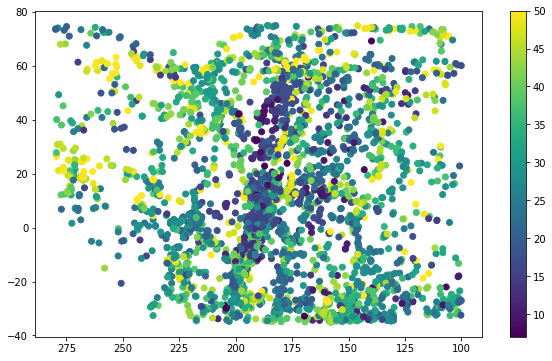

In [107]:
# plot positions of matched sources
v2 = int(3500./70)
v1 = int(500./70)
plt.figure(figsize=(10,6))
plt.scatter(c['ra_01'],c['dec_01'],c=c['dist_mpc'],vmin=v1,vmax=v2)
plt.gca().invert_xaxis()
plt.colorbar()

Text(0, 0.5, '$\\log_{10}(SFR/M_\\odot/yr)$')

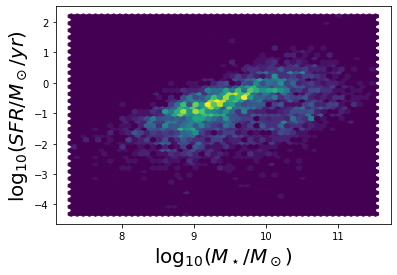

In [114]:
plt.figure()
plt.hexbin(c['logmass'],c['logsfr'],gridsize=50)
plt.xlabel('$\log_{10}(M_\star /M_\odot)$',fontsize=20)
plt.ylabel('$\log_{10}(SFR/M_\odot/yr)$',fontsize=20)


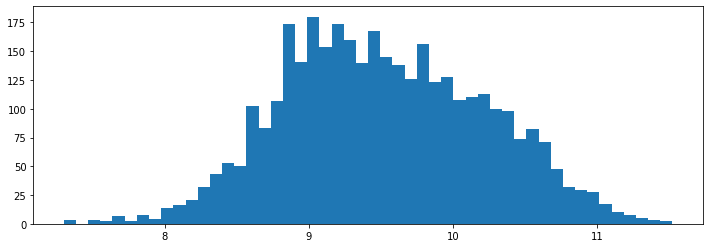

In [96]:
plt.figure(figsize=(12,4))
#flag =  (c['has_wise1'] == '1) & ((c['has_nuv'] == '1') |(c['has_wise4'] == '1'))
#mybins = np.arange(0,350,50)
t =plt.hist(c['logmass'],bins=50)#,bins=mybins)
#plt.xticks(np.arange(0,350,50))

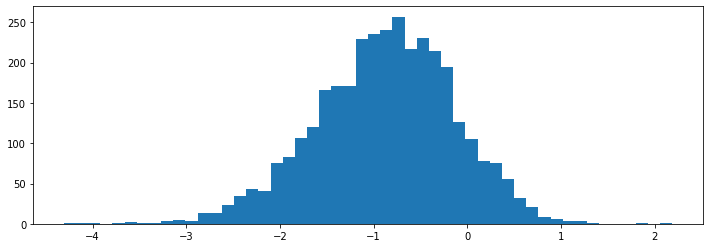

In [95]:
plt.figure(figsize=(12,4))
#flag =  (c['has_wise1'] == '1) & ((c['has_nuv'] == '1') |(c['has_wise4'] == '1'))
#mybins = np.arange(0,350,50)
t =plt.hist(c['logsfr'],bins=50)#,bins=mybins)
#plt.xticks(np.arange(0,350,50))


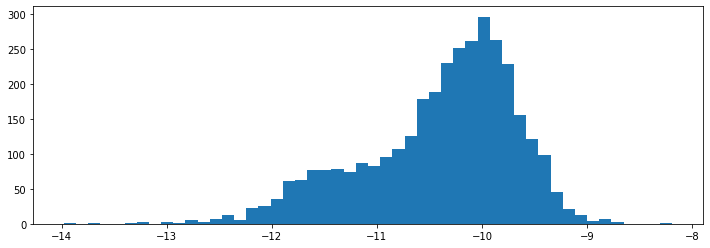

In [94]:
plt.figure(figsize=(12,4))
ssfr = c['logsfr'] - c['logmass']
t =plt.hist(ssfr,bins=50)#,bins=mybins)